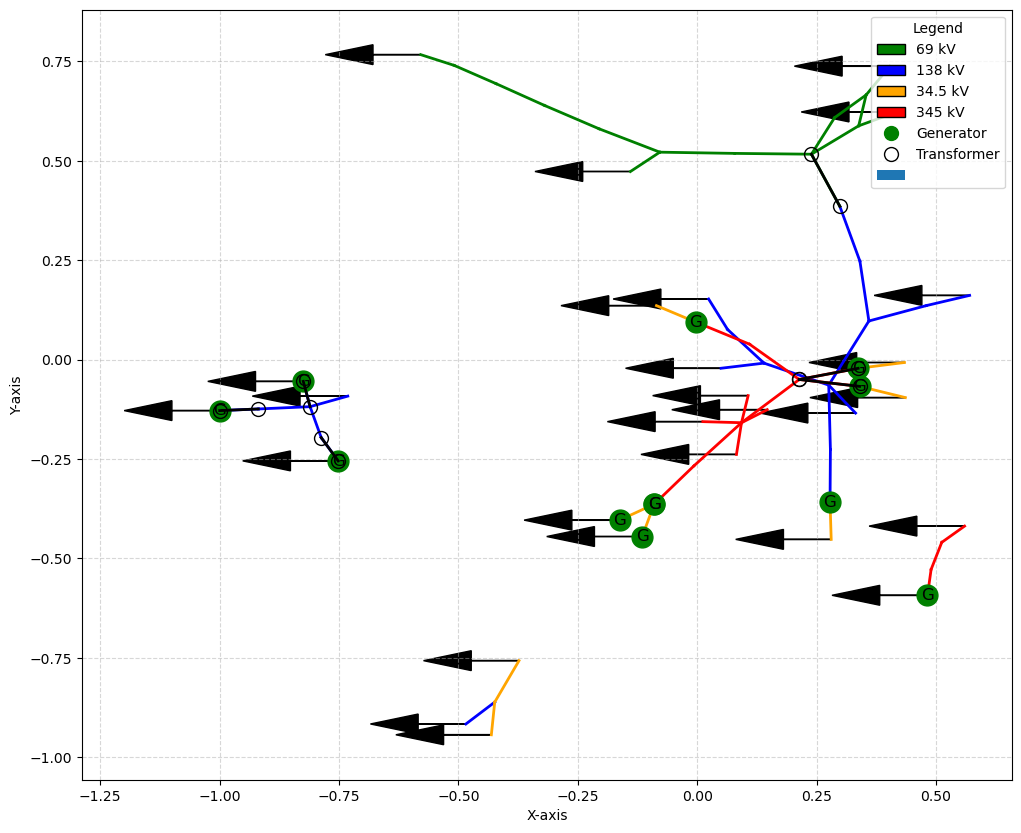

<Figure size 640x480 with 0 Axes>

In [206]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load Excel file
file_path = r"C:\Users\plaks\Downloads\icf_assignment\Assignment_Branch_Data.xlsx"  # Replace with your file's name
excel_data = pd.ExcelFile(file_path)

# Read each sheet
line_data = excel_data.parse('Line Data')
generator_data = excel_data.parse('Generator Data')

# Create a graph from the line data
G = nx.Graph()
for _, row in line_data.iterrows():
    G.add_edge(row['From Bus Number'], row['To Bus Number'], kv=row['From Bus kV'])

# Assign colors based on voltage levels
color_map = {69: 'green', 138: 'blue', 34.5: 'orange', 345: 'red'}

# Plot the SLD
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)

# Draw buses as lines
for u, v in G.edges():
    kv = G[u][v]['kv']
    plt.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], color=color_map[kv], linewidth=2)

# Draw generators
for _, row in generator_data.iterrows():
    bus = row['Bus Number']
    x, y = pos[bus]
    plt.plot(x, y, 'go', markersize=15)
    plt.text(x, y, 'G', ha='center', va='center', fontsize=12)

# Draw loads
for node in G.nodes():
    if G.degree(node) == 1:
        x, y = pos[node]
        plt.arrow(x, y, -0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Draw transformers
for u, v in G.edges():
    # Check if the edge exists in the line_data DataFrame
    filter_result = line_data.loc[(line_data['From Bus Number'] == u) & (line_data['To Bus Number'] == v), 'To Bus kV']
    
    if not filter_result.empty:  # Ensure there is a match
        to_kv = filter_result.values[0]
        if G[u][v]['kv'] != to_kv:  # Check if the voltage levels differ
            x1, y1 = pos[u]
            x2, y2 = pos[v]
            # Draw transformer as overlapping circles
            plt.plot([x1, x2], [y1, y2], 'k-', linewidth=2)  # Line connecting transformer
            plt.plot(x1, y1, 'ko', markersize=10, fillstyle='none')  # Circle for bus 1
            plt.plot(x2, y2, 'ko', markersize=10, fillstyle='none')  # Circle for bus 2
    else:
        pass
# print(f"Edge ({u}, {v}) not found in line_data.")

# Add legends
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='69 kV'),
    Patch(facecolor='blue', edgecolor='black', label='138 kV'),
    Patch(facecolor='orange', edgecolor='black', label='34.5 kV'),
    Patch(facecolor='red', edgecolor='black', label='345 kV'),
    plt.Line2D([0], [0], color='g', marker='o', linestyle='None', markersize=10, label='Generator'),
    plt.Line2D([0], [0], color='k', marker='o', linestyle='None', markersize=10, fillstyle='none', label='Transformer'),
    plt.Arrow(0, 0, -0.1, 0, width=0.1),  # Dummy element for load
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=10, title="Legend", frameon=True)

# Show axis with grid and ticks
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.axis('on')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()
plt.savefig('sld.png')


In [208]:
"""The x-axis and y-axis values are unitless. They are simply the normalized spatial coordinates of the nodes generated by the layout algorithm.
For example, if a bus is located at position (0.5, 0.3), these values just indicate where the bus appears relative to others in the plotted diagram."""

'The x-axis and y-axis values are unitless. They are simply the normalized spatial coordinates of the nodes generated by the layout algorithm.\nFor example, if a bus is located at position (0.5, 0.3), these values just indicate where the bus appears relative to others in the plotted diagram.'